In [20]:
### applies pre-processing steps to images
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import os

In [21]:
# get number of images

directory = "images/writable_area_lilienfeld"
num_files = len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])
print(f"Number of files: {num_files}")

Number of files: 1283


In [22]:
def binarize_dir_adaptive(dir):
    os.makedirs(f'images/preprocessed_imgs/binarized_imgs/{dir}', exist_ok=True)

    for file in os.listdir('images/' + dir):
        img_name = str(file)
        img_path = f'images/{dir}/{img_name}'
        img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
        
        # Apply adaptive thresholding
        thresh = cv.adaptiveThreshold(
            img,
            maxValue=255,
            adaptiveMethod=cv.ADAPTIVE_THRESH_GAUSSIAN_C,  # or cv.ADAPTIVE_THRESH_MEAN_C
            thresholdType=cv.THRESH_BINARY,
            blockSize=45,     # size of neighborhood (must be odd, e.g., 11, 15, 35...)
            C=10              # constant subtracted from mean; tweak for contrast
        )

        out_path = f'images/preprocessed_imgs/binarized_imgs/{dir}/{img_name}'
        cv.imwrite(out_path, thresh)
        print(f'Successfully wrote {out_path}')

In [23]:
# select directory of images to binarize

source_dir = 'writable_area_goettweig' 

binarize_dir_adaptive(source_dir)

Successfully wrote images/preprocessed_imgs/binarized_imgs/writable_area_goettweig/9a46a8a7fff18858c10c19cccd27c3f6.jpg
Successfully wrote images/preprocessed_imgs/binarized_imgs/writable_area_goettweig/a98966f6b468309f575b4ee0d4ee3347.jpg
Successfully wrote images/preprocessed_imgs/binarized_imgs/writable_area_goettweig/43f55a9807deb4045481bd892d7bf183.jpg
Successfully wrote images/preprocessed_imgs/binarized_imgs/writable_area_goettweig/ac6db7b8bb8db9d2faed9aa8867c8b6e.jpg
Successfully wrote images/preprocessed_imgs/binarized_imgs/writable_area_goettweig/2b3d6b207d7b5feab5eab4893a033f80.jpg
Successfully wrote images/preprocessed_imgs/binarized_imgs/writable_area_goettweig/077b6733bfd190e5eb147af31d809642.jpg
Successfully wrote images/preprocessed_imgs/binarized_imgs/writable_area_goettweig/a931fc89cf18f1a693b4eca75e3dae40.jpg
Successfully wrote images/preprocessed_imgs/binarized_imgs/writable_area_goettweig/5fc43a7d7165537182956a340fe2aa97.jpg
Successfully wrote images/preprocessed_i

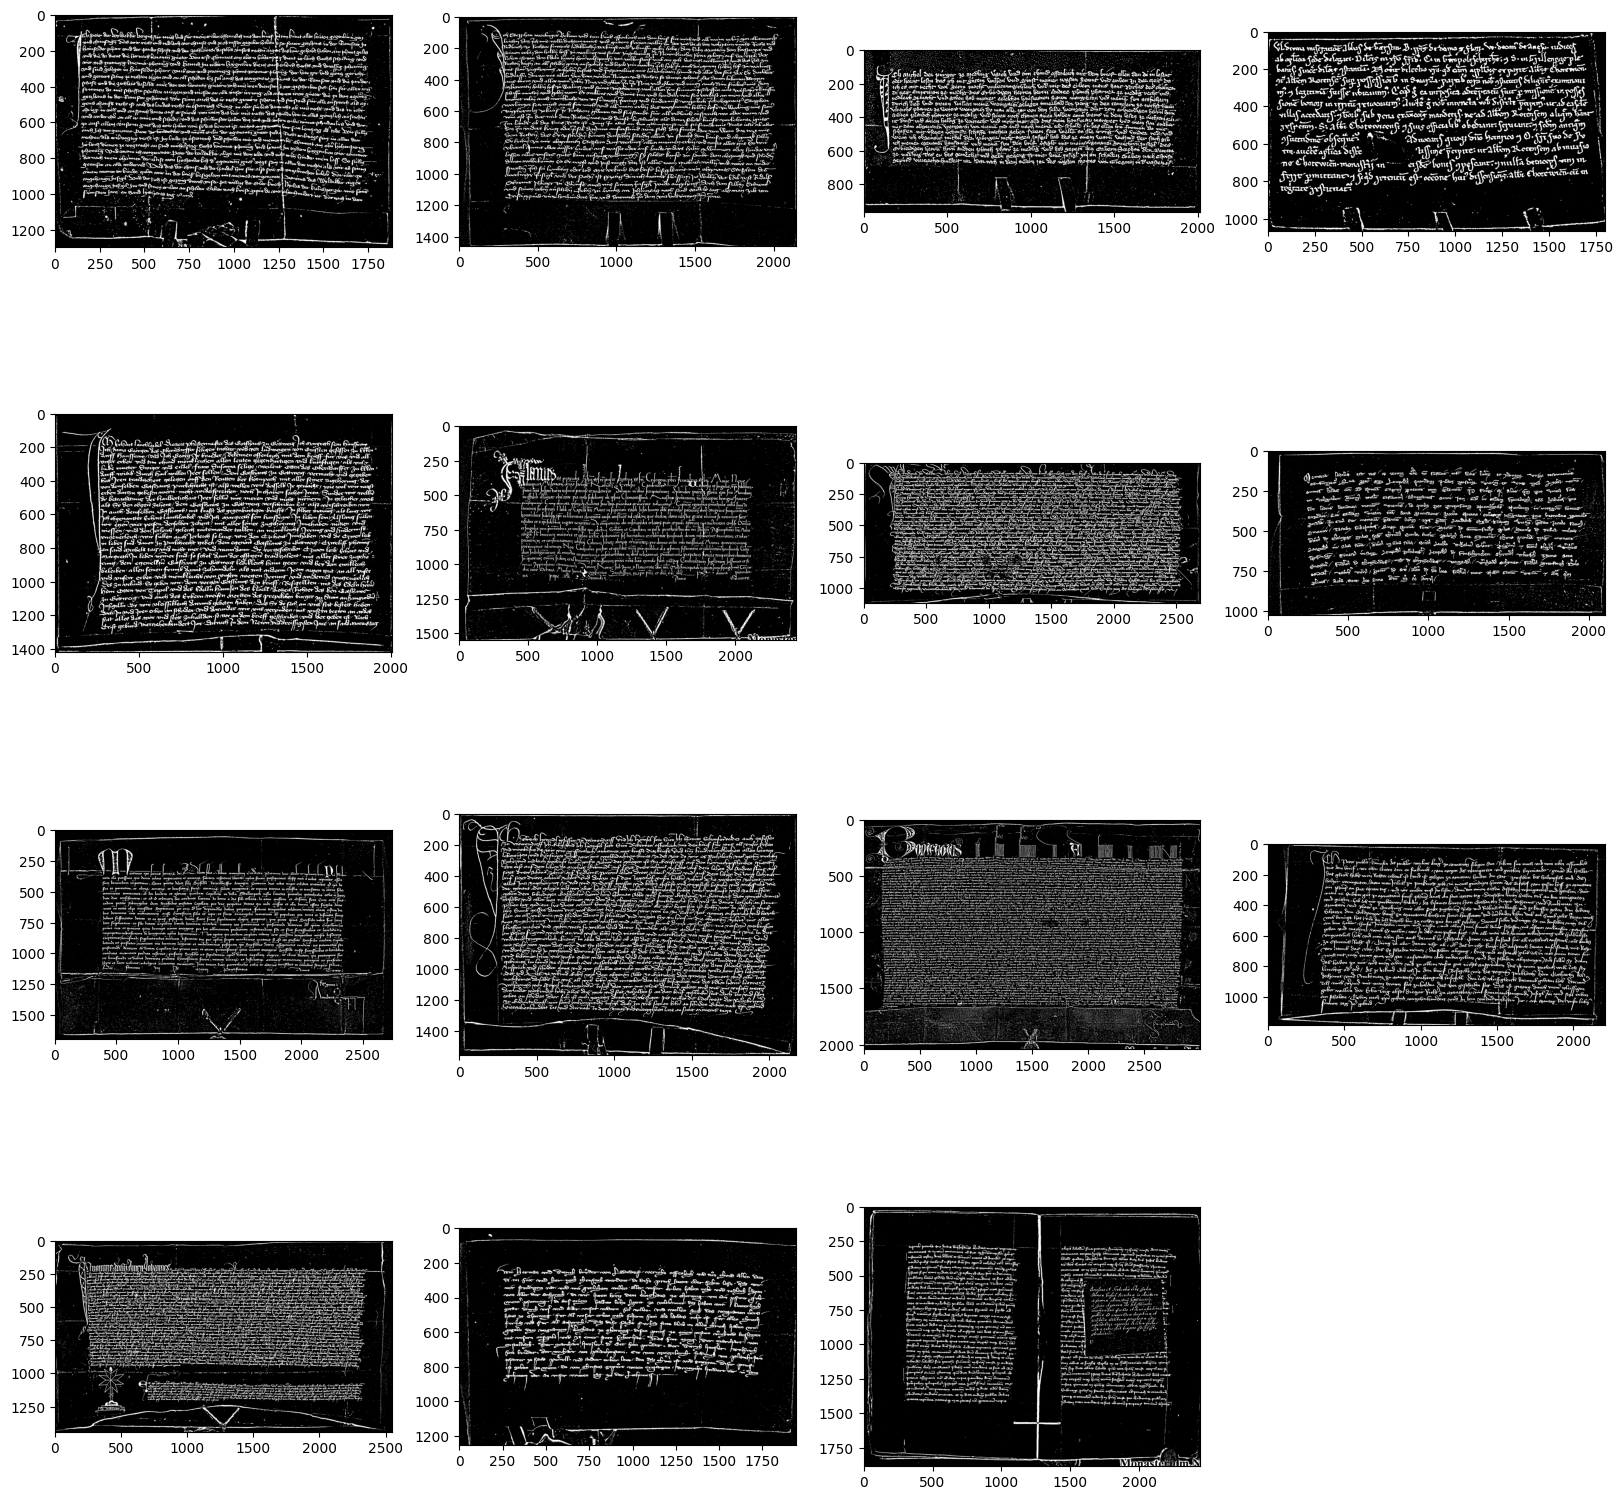

In [24]:
### visualize results
result_dir = os.listdir(f'images/preprocessed_imgs/binarized_imgs/{source_dir}')
plt.figure(figsize = (20, 20));
num = 16 # num of items to visualize
for i in range(1, num): 
    plt.subplot(4, 4, i); # number of rows, number of columns, item number
    img = mpimg.imread(f'images/preprocessed_imgs/binarized_imgs/{source_dir}/' + result_dir[i])
    plt.imshow(img, cmap = plt.cm.binary);
plt.show()